In [1]:
import pymetheus
from pymetheus.pymetheus import LogicNet
import numpy as np
ll = LogicNet()

In [2]:
print(pymetheus.__version__)
ll.constant('John', definition=np.random.normal(0,.1,size=2))
ll.constant('Jim', definition=np.random.normal(0,.1,size=2))
ll.constant('Jack', definition=np.random.normal(0,.1,size=2))
ll.constant('Mary', definition=np.random.normal(1,.1,size=2))
ll.constant('Meggy', definition=np.random.normal(1,.1,size=2))
ll.constant('Mina', definition=np.random.normal(1,.1,size=2))

0.1.0


In [3]:
ll.constant('Person1', definition=np.random.normal(0.5,.1,size=2), optimize=True)
ll.constant('Person2', definition=np.random.normal(0.5,.1,size=2), optimize=True)

In [4]:
for a,b in ll.constants.items():
    print(a,b)
values_of_constants = np.array([b.cpu().detach().numpy() for a,b in ll.constants.items()])
print(values_of_constants)
print(values_of_constants[:3,0])

John tensor([-0.0470,  0.0894])
Jim tensor([-0.0236, -0.2426])
Jack tensor([-0.1672, -0.1512])
Mary tensor([0.9695, 0.9684])
Meggy tensor([1.1199, 0.9448])
Mina tensor([1.2675, 1.0521])
Person1 tensor([0.3999, 0.5218], requires_grad=True)
Person2 tensor([0.3312, 0.5219], requires_grad=True)
[[-0.04697123  0.08942562]
 [-0.02357473 -0.24263982]
 [-0.16721351 -0.15116139]
 [ 0.96950084  0.96839356]
 [ 1.1198741   0.944797  ]
 [ 1.2675469   1.0521317 ]
 [ 0.3999294   0.5218383 ]
 [ 0.33120367  0.521883  ]]
[-0.04697123 -0.02357473 -0.16721351]


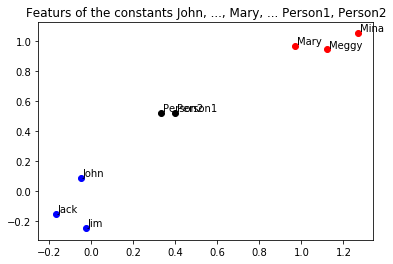

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
values_of_constants = np.array([b.detach().cpu().numpy() for a,b in ll.constants.items()])
plt.scatter(values_of_constants[:3,0],values_of_constants[:3,1],c='b')

plt.scatter(values_of_constants[3:6,0],values_of_constants[3:6,1],c='r')
plt.scatter(values_of_constants[6:,0],values_of_constants[6:,1],c='k')

for a,b in ll.constants.items():
    plt.annotate(a,b.detach().cpu().numpy()+.01)
plt.title("Featurs of the constants John, ..., Mary, ... Person1, Person2")
plt.show()


In [6]:
ll.predicate('Male', arity=1, argument_size = 2) # A is a unary predicate on objects with 2 features
ll.predicate('Female', arity=1, argument_size = 2) # B is a unary predicato on objects with 2 features
ll.predicate('CanPlayWith', arity=2, argument_size = 2) # R is a binary relation on objects with 2 features 

In [7]:
print(ll.reason('Male(John)'))
print(ll.reason('Female(John)'))
print(ll.reason('Male(Jack)'))
print(ll.reason('Female(Mary)'))
print(ll.reason('CanPlayWith(John,Mary)'))

0.42849967
0.51914024
0.4370257
0.57888734
0.31468517


In [8]:
import numpy as np
men = np.array([np.array([ll.reason('Male({})'.format(a))]) for a, b in ll.constants.items()])
women = np.array([np.array([ll.reason('Female({})'.format(a))]) for a, b in ll.constants.items()])
men

array([[0.42849967],
       [0.42372632],
       [0.4370257 ],
       [0.42090303],
       [0.40797225],
       [0.4066148 ],
       [0.42077392],
       [0.42358226]], dtype=float32)

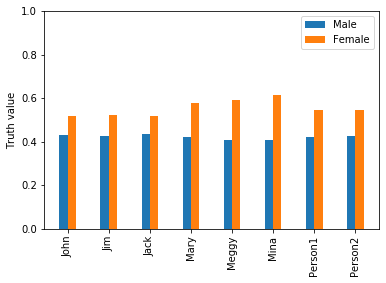

In [9]:
fig, ax = plt.subplots()
ax.bar(np.arange(len(ll.constants))-.1,men[:,0],width=.2,label="Male")
ax.bar(np.arange(len(ll.constants))+.1,women[:,0],width=.2,label="Female")
ax.set_xticks(np.arange(len(ll.constants)))
ax.set_xticklabels(ll.constants.keys(),rotation='vertical')
ax.set_ylabel("Truth value")
ax.set_ylim(0,1)
ax.legend()
plt.show()

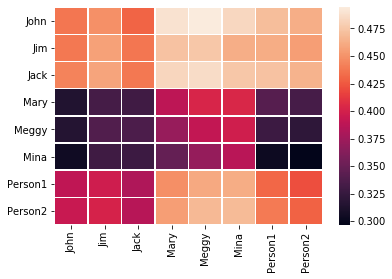

In [10]:
play = np.array([[ll.reason('CanPlayWith({},{})'.format(c,d)) 
                  for c in ll.constants.keys()] for d in ll.constants.keys()])
import seaborn as sns
plt.clf()
ax = sns.heatmap(play, linewidth=0.5)
ax.set_yticklabels(ll.constants.keys(),rotation='horizontal')
ax.set_xticklabels(ll.constants.keys(),rotation='vertical')
plt.show()

In [11]:
ll.knowledge("Male(John)")
ll.knowledge("Male(Jack)")
ll.knowledge('~Male(Mary)')
ll.knowledge('~Male(Meggy)')
ll.knowledge('Female(Mary)')
ll.knowledge('Female(Meggy)')
ll.knowledge('~Female(John)')
ll.knowledge('~Female(Jack)')
ll.knowledge('CanPlayWith(John,Mary)')
ll.knowledge('CanPlayWith(Meggy,Jack)')
ll.knowledge('~CanPlayWith(Meggy,Mary)')
ll.knowledge('~CanPlayWith(Jim,Jack)')
ll.knowledge('CanPlayWith(Person1,Jim)')
ll.knowledge('CanPlayWith(Person2,Mina)')

In [12]:
ll.reason("CanPlayWith(Person2,Mary)")

0.3338107

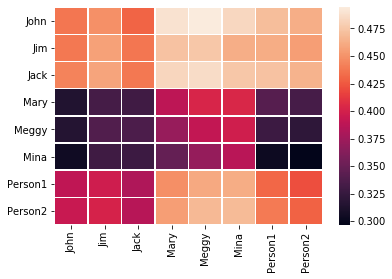

In [13]:
play = np.array([[ll.reason('CanPlayWith({},{})'.format(c,d)) 
                  for c in ll.constants.keys()] for d in ll.constants.keys()])
import seaborn as sns
plt.clf()
ax = sns.heatmap(play, linewidth=0.5)
ax.set_yticklabels(ll.constants.keys(),rotation='horizontal')
ax.set_xticklabels(ll.constants.keys(),rotation='vertical')
plt.show()

In [14]:
import numpy as np
men = np.array([np.array([ll.reason('Male({})'.format(a))]) for a, b in ll.constants.items()])
women = np.array([np.array([ll.reason('Female({})'.format(a))]) for a, b in ll.constants.items()])

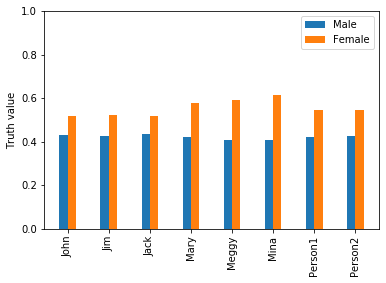

In [15]:
fig, ax = plt.subplots()
ax.bar(np.arange(len(ll.constants))-.1,men[:,0],width=.2,label="Male")
ax.bar(np.arange(len(ll.constants))+.1,women[:,0],width=.2,label="Female")
ax.set_xticks(np.arange(len(ll.constants)))
ax.set_xticklabels(ll.constants.keys(),rotation='vertical')
ax.set_ylabel("Truth value")
ax.set_ylim(0,1)
ax.legend()
plt.show()

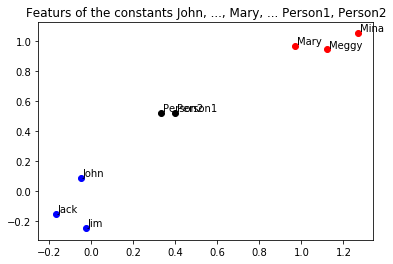

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
values_of_constants = np.array([b.detach().numpy() for a,b in ll.constants.items()])
plt.scatter(values_of_constants[:3,0],values_of_constants[:3,1],c='b')
plt.scatter(values_of_constants[3:6,0],values_of_constants[3:6,1],c='r')
plt.scatter(values_of_constants[6:,0],values_of_constants[6:,1],c='k')

for a,b in ll.constants.items():
    plt.annotate(a,b.detach().numpy()+.01)
plt.title("Featurs of the constants John, ..., Mary, ... Person1, Person2")
plt.show()


In [17]:
domain_of_variables = np.random.uniform(0,1,size=(100,2))
ll.variable('?x', domain_of_variables, labelled=False)
ll.variable('?y', domain_of_variables, labelled=False)


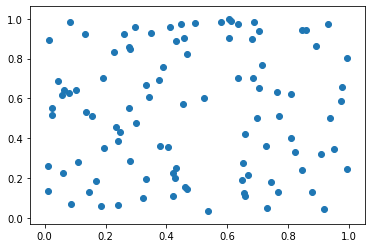

In [18]:
plt.scatter(domain_of_variables[:,0],domain_of_variables[:,1])
plt.show()

In [19]:
ll.universal_rule('forall ?x,?y: CanPlayWith(?x,?y) -> ((Male(?x) & Female(?y)) | (Female(?x) & Male(?y)))')

ll.universal_rule('forall ?x,?y: ((Male(?x) & Female(?y)) -> CanPlayWith(?x,?y))')
ll.universal_rule('forall ?x,?y: ((Female(?x) & Male(?y)) -> CanPlayWith(?x,?y))')
ll.universal_rule('forall ?x,?y: (CanPlayWith(?x,?y) -> CanPlayWith(?y,?x))')
ll.universal_rule('forall ?x: (Male(?x) % ~Female(?x))')




In [20]:
ll.reason('forall ?x,?y: CanPlayWith(?x,?y) -> ((Male(?x) & Female(?y)) | (Female(?x) & Male(?y)))')

array(1., dtype=float32)

In [21]:
ll.fit(epochs=1000, grouping=1000)

Current Satisfiability 0.989664):   8%|▊         | 79/1000 [02:01<22:44,  1.48s/it]

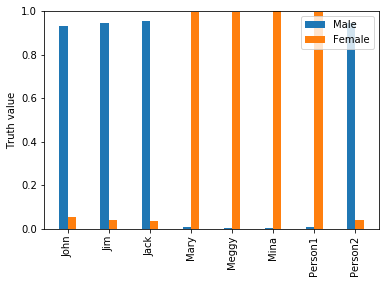

In [22]:
import numpy as np
men = np.array([np.array([ll.reason('Male({})'.format(a))]) for a, b in ll.constants.items()])
women = np.array([np.array([ll.reason('Female({})'.format(a))]) for a, b in ll.constants.items()])

fig, ax = plt.subplots()
ax.bar(np.arange(len(ll.constants))-.1,men[:,0],width=.2,label="Male")
ax.bar(np.arange(len(ll.constants))+.1,women[:,0],width=.2,label="Female")
ax.set_xticks(np.arange(len(ll.constants)))
ax.set_xticklabels(ll.constants.keys(),rotation='vertical')
ax.set_ylabel("Truth value")
ax.set_ylim(0,1)
ax.legend()
plt.show()

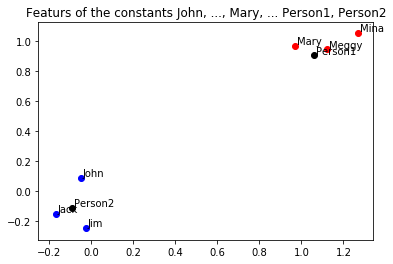

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline
values_of_constants = np.array([b.detach().numpy() for a,b in ll.constants.items()])
plt.scatter(values_of_constants[:3,0],values_of_constants[:3,1],c='b')
plt.scatter(values_of_constants[3:6,0],values_of_constants[3:6,1],c='r')
plt.scatter(values_of_constants[6:,0],values_of_constants[6:,1],c='k')

for a,b in ll.constants.items():
    plt.annotate(a,b.detach().numpy()+.01)
plt.title("Featurs of the constants John, ..., Mary, ... Person1, Person2")
plt.show()


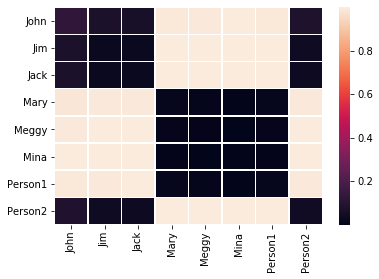

In [35]:
play = np.array([[ll.reason('CanPlayWith({},{})'.format(c,d)) 
                  for c in ll.constants.keys()] for d in ll.constants.keys()])
import seaborn as sns
plt.clf()
ax = sns.heatmap(play, linewidth=0.5)
ax.set_yticklabels(ll.constants.keys(),rotation='horizontal')
ax.set_xticklabels(ll.constants.keys(),rotation='vertical')
plt.show()

In [34]:
#ll.reason("CanPlayWith(Person2,Person2)")

0.044234276